<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

<div style="background-color:#013220">
In deze Notebook probeer je YOLO in het echt uit. Er wordt ook opnieuw gewezen op het belang van een goede dataset. 
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>1. Belang van een goede dataset</h2> 
    </font>
</div>

Er is altijd een `dataset (= voorbeelden)` nodig waarop het model getraind wordt. Deze dataset is essentieel voor een goed werkend model; het model haalt uit deze datatset zijn info om objecten te kunnen herkennen. Deze dataset moet nauwkeurig samengesteld worden, want een `ongevarieerde dataset kan leiden tot fouten bij het herkennen van de objecten.`

<div style="background-color:#013220">
Zo werd er een model getraind dat een wolf van een husky kon onderscheiden.
Hoewel wolven en huskies op elkaar lijken, leek het algoritme toch een 90 % nauwkeurigheid te hebben. Tot er een foto van een wolf met sneeuw op de achtergrond werd gebruikt en het algoritme hem classificeerde als husky. Al snel werd duidelijk dat het algoritme zo een goede resultaten haalde, omdat het zich baseerde op de achtergrond. Er werd dus een <b>sneeuwdetector</b> gemaakt in de plaats van een <b>husky versus wolf detector</b>.<br><br>
    <figure>
  <img src="../_afbeeldingen/wolfhusky.jpg" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:60%"/>
    </figure>

Om zulke fouten te vermijden heb je een dataset nodig met objecten op zoveel mogelijk verschillende plaatsen en achtergronden. Voor de training van het YOLO-model werden al heel wat van die gevarieerde datasets gebruikt. Toch is YOLO verre van perfect.
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1>2. Modules installeren en importeren</h1> 
    </font>
</div>

### Modules installeren en inladen

Voer de cel hieronder uit om de bibliotheek `opencv` te installeren; dit is een belangrijke bibliotheek binnen de beeldverwerking. 

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Alle modules die je voor deze Notebook nodig zal hebben.

In [2]:
# inladen nodige modules.
import cv2
import numpy as np
import matplotlib.pyplot as plt

from detectie import open_camera, yolo_verwerking, realtime, get_camera_src

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>3. Camera gebruik</h2> 
    </font>
</div>

Je zal met een camera objecten in beeld brengen en deze objecten laten detecteren en classificeren met het YOLO-algoritme.
Je kan hiervoor de webcam van je laptop gebruiken of de camera van een smartphone.

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.1 Laptopcamera</h3> 
    </font>
</div>

Hiervoor hoef je niets te installeren. Ga verder naar <a href="#YOLO"><b>4. YOLO-algoritme gebruiken</b></a>.

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.2 Smartphonecamera </h3> 
    </font>
</div>

Je kan gebruikmaken van de camera van een smartphone via de app `droidcam`. Installeer de app op de smartphone via de appstore.<br> Op de computer installeer je de `droidcam client`, dit kan via volgende link:<br> https://droidcam-client.en.uptodown.com/windows/download.<br><br>
Als de droidcam client opent, krijg je volgend scherm te zien:<br><br>
<figure>
  <img src="../_afbeeldingen/droidcam.jpg" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:30%">
</figure><br>
Vul het gevraagde in aan de hand van de gegevens op de app op de smartphone (<b>IP en poort</b>) en klik op 'Start'. <br><br>
Ga vervolgens in de Chrome-browser naar instellingen en kies daar voor:<br>
<center><b>Beveiliging en privacy > Site-instellingen > Camera.</b></center> <br>    Met behulp van het pijltje kan je nu een droidcam source kiezen als camera. 
</div>

<div id="YOLO" style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>4. YOLO-algoritme toepassen op foto</h2> 
    </font>
</div>

Voer onderstaande functie `get_camera_src` uit. De nummers duiden de camera's aan die op de laptop gedetecteerd zijn.

In [6]:
print(get_camera_src())

[0, 1, 3]


Voer de functie `open_camera` in onderstaande code-blok uit, om een camera naar keuze te openen.
- Druk op `s`: om een foto op te slaan in een bestand **afbeelding_camera.jpg**.
- Druk op `q`: om de camera te sluiten.



<div style="background-color:#8B0000"> 
Kies een camera-nummer uit de bovenaan bekomen lijst. Meestal is dit 0.
</div>

Als je een goede foto hebt, kan je deze verwerken via de functie `yolo_verwerking` in het tweede code-blok.

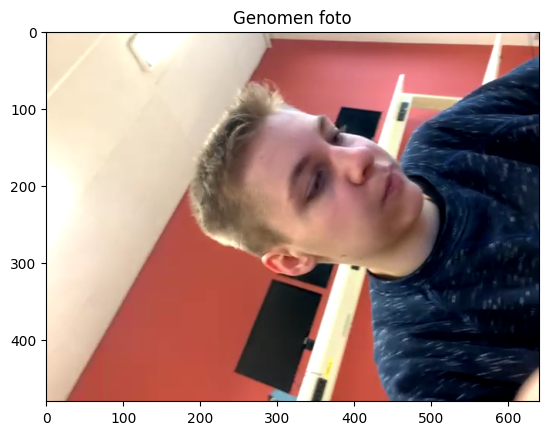

In [11]:
open_camera(3)

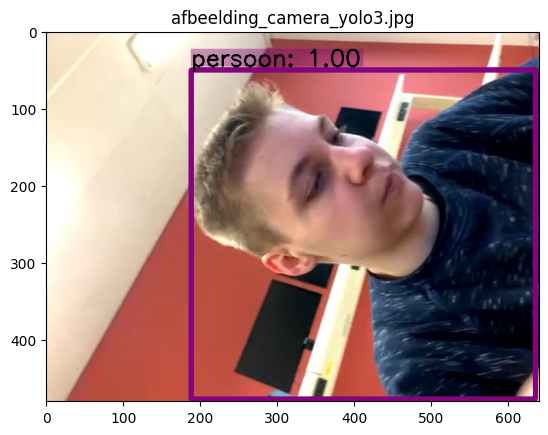

In [12]:
yolo_verwerking("afbeelding_camera.jpg")

### Oefen mee 4.1

-  Welke objecten worden door het algoritme juist gedetecteerd? 

**Antwoord:** laptops, mensen, muizen, telefoons

- Welke objecten worden door het algoritme niet of onjuist gedetecteerd? 

**Antwoord:** /

<div id="YOLO" style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>5. Objecten van het YOLO-algoritme </h2> 
    </font>
</div>

Het YOLO-algoritme maakt gebruik van een uitgebreide dataset, maar in die dataset zitten natuurlijk niet alle objecten die op de wereld te vinden zijn. Dit is onmogelijk. Voor het YOLO-algoritme werd een dataset opgebouwd waarin een beperkt aantal objecten van verschillende categorieën inzitten.

De volgende objecten kunnen door het algoritme gedetecteerd worden: <br><br>
<div style="float: left; width: 15%"> 
    <ul>
        <li>persoon</li>
        <li>fiets</li>
        <li>auto</li>
        <li>motor</li>
        <li>vliegtuig</li>
        <li>bus</li>
        <li>trein</li>
        <li>vrachtwagen</li>
        <li>boot</li>
        <li>plant</li>
        <li>bed</li>
        <li>eettafel</li>
        <li>toaster</li>
        <li>tandenborstel</li>
    </ul>
</div>
<div style="float: left; width: 15%;">
    <ul>
        <li>vogel</li>
        <li>kat</li>
        <li>hond</li>
        <li>paard</li>
        <li>schaap</li>
        <li>koe</li>
        <li>olifant</li>
        <li>beer</li>
        <li>zebra</li>
        <li>giraf</li>
        <li>vaas</li>
        <li>schaar</li>
        <li>wasbak</li>
        <li>teddybeer</li>
    </ul>
</div>
<div style="float: left; width: 15%;">
    <ul>
        <li>stoplicht</li>
        <li>brandkraan</li>
        <li>stopbord</li>
        <li>parkeermeter</li>
        <li>bank</li>
        <li>rugzak</li>
        <li>paraplu</li>
        <li>handtas</li>
        <li>das</li>
        <li>koffer</li>
        <li>frisbee</li>
        <li>ski's</li>
        <li>koelkast</li>
    </ul>
</div>
<div style="float: right; width: 25%;">
    <ul>
        <li>snowboard</li>
        <li>sportbal</li>
        <li>kite</li>
        <li>baseballbat</li>
        <li>baseballhandschoen</li>
        <li>skateboard</li>
        <li>surfboard</li>
        <li>tennisracket</li>
        <li>fles</li>
        <li>wijnglas</li>
        <li>hotdog</li>
        <li>pizza</li>
        <li>boek</li>
    </ul>
</div>
<div style="float: right; width: 15%;">
    <ul>
        <li>glas</li>
        <li>vork</li>
        <li>mes</li>
        <li>lepel</li>
        <li>kom</li>
        <li>banaan</li>
        <li>appel</li>
        <li>sandwich</li>
        <li>appelsien</li>
        <li>broccoli</li>
        <li>wortel</li>
        <li>donut</li>
        <li>klok</li>
    </ul>
</div>
<div style="float: right; width: 15%;">
    <ul>
        <li>cake</li>
        <li>stoel</li>
        <li>sofa</li>
        <li>toilet</li>
        <li>tvmonitor</li>
        <li>laptop</li>
        <li>muis</li>
        <li>afstandbediening</li>
        <li>toetsenbord</li>
        <li>gsm</li>
        <li>microgolfoven</li>
        <li>oven</li>
        <li>haardroger</li>
    </ul>
</div>
</div>

### Oefen mee 5.1

- Kijk nu of de objecten die je voorheen niet kon detecteren in het lijstje staan. Is er een object dat in het lijstje staat en toch niet gedetecteerd kon worden? 

**Antwoord:**

-  Indien ja, hoe denk je dat dit komt? Indien nee, kan je een situatie bedenken waarin dit zal voorkomen?

**Antwoord:**

<div style="background-color:#000065"> 
Er zijn verschillende redenen waarom een object niet goed gedetecteerd kan worden. De lichtinval is bv. belangrijk: als de foto over- of onderbelicht is, kan het algoritme minder goed werken. <br>

Je weet reeds dat de computer een afbeelding ziet als een raster van pixels. Als de belichting anders is, zullen deze pixels niet dezelfde kleurwaarde hebben als deze van de **dataset**, waardoor het algoritme problemen ondervindt. 

Zoals je hebt gezien in de inleiding, kan de achtergrond ook een grote rol spelen. 

Er kunnen dus heel wat problemen ontstaan zijn bij het detecteren van een foto. Dit benadrukt dus nogmaals de noodzaak van een **uitgebreide en gevarieerde dataset**. 
</div>

### Oefen mee 5.2
-  Werd een object uit bovenstaande lijst niet herkend, voer dan het experiment nogmaals uit met hetzelfde object, maar met een andere foto. Je zal zien dat in de meeste gevallen het object met een goede foto nu wel juist gedetecteerd wordt. 

Hieruit blijkt dus dat een algoritme nog zo goed kan zijn ... als de omstandigheden waarin de inputfoto wordt genomen niet optimaal zijn, zal het algoritme ook minder goed functioneren.

<div id="YOLO" style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>6. YOLO-algoritme in realtime</h2> 
    </font>
</div>

Tenslotte kunnen we het algoritme in realtime objectdetectie laten uitvoeren. Voer onderstaande code-blok uit. Je kan deze stoppen via de knop **q**.
- De eerste parameter is de **camera** (0, 1, 2, ...). 
- De tweede parameter is het **yolo-model** ('normal' of 'tiny), hier zodalijk meer info over.

In [ ]:
realtime(3, 'normal')

Je zal merken dat realtime niet erg snel, maximaal 5 FPS. De reden hiervoor is dat YOLO afbeeldingen verwerkt met de CPU van de computer. CPU's zijn hier niet voor geschikt, we zouden eigenlijk een GPU (Graphical Processing Unit) moeten gebruiken. Een laptop met ingebouwde GPU is echter vrij duur.

Verander het argument `normal` naar `tiny`. We gebruiken nu het model `yolov3_tiny` in plaats van `yolov3`. Dit model zal de afbeeldingen minder verwerken vooral ze objecten te detecteren. Gevolg is dat de snelheid verhoogt.

### Oefen mee 6.1
- Vergelijk de grootte van yolov3.weights en yolov3_tiny.weights. Wat merk je op?

**Antwoord:**

- Welke verschillen merk je tussen yolov3_tiny en yolov3?

**Antwoord:**

  <a href="https://www.aiopschool.be/dwengo/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 